# 分布に利用する関数

- 執筆期間：2022/03/01 - 2022/03/03

In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-03-04 00:25


# Pythonでガンマ関数の作図

　ガンマ関数(Gamma Function)の計算を確認して、グラフを作成します。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用するライブラリ
import numpy as np
from scipy.special import gamma, gammaln # ガンマ関数, 対数ガンマ関数
import matplotlib.pyplot as plt

<br>

## 定義式の確認

　まずは、ガンマ関数の定義式を確認します。  
<br>

　ガンマ関数は、次の式で定義されます。

$$
\Gamma(x)
  = \int_0^{\infty}
        u^{x-1}
        e^{-u}
    du
$$

　ここで、$e$はネイピア数です。ガンマ関数については「ガンマ関数の性質」を参照してください。  
<br>

## ガンマ関数の計算

　続いて、ガンマ関数の計算方法を確認します。  
<br>

　`SciPy`ライブラリの`special`モジュールのガンマ関数`gamma()`を使って計算します。

In [3]:
# 変数の値を指定
x = 4.0

# ガンマ関数の計算
y = gamma(x)
print(y)

6.0


<br>

　対数ガンマ関数`gammaln()`を使って計算します。

In [4]:
# 対数ガンマ関数による計算
log_y = gammaln(x)
z = np.exp(log_y)
print(y)

6.0


　計算結果の指数をとるとガンマ関数の計算結果が得られます。  
<br>

　ガンマ関数の計算は非常に大きな値になるため、引数(変数)$x$によっては発散してしまいます。

In [5]:
# ガンマ関数を計算:(発散)
print(gamma(171.0))
print(gamma(172.0))

7.257415615308e+306
inf


<br>

　途中計算などでは、対数ガンマ関数を使うことで計算できます。

In [6]:
# 対数ガンマ関数による計算
print(gammaln(172.0))

711.71472580229


<br>

　$x$が0または負の整数の場合は計算できません。

In [7]:
# ガンマ関数を計算:(計算できない)
print(gamma(0.0))
print(gamma(-3.0))

inf
inf


<br>

　ガンマ関数の計算を確認できました。次は、ガンマ関数を可視化します。  
<br>

## グラフの作成

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用して、ガンマ関数のグラフを作成します。  
<br>

### 非負の値の場合

　まずは、0より大きい実数$x$を範囲として、ガンマ関数を計算します。

In [8]:
# xの値を指定:(x > 0)
x_vals = np.arange(start=0.01, stop = 6.0, step=0.01)
print(x_vals[:5])

# ガンマ関数の計算
y_vals = gamma(x_vals)
print(y_vals[:5])

[0.01 0.02 0.03 0.04 0.05]
[99.43258512 49.44221016 32.78499835 24.46095502 19.47008531]


　x軸の値を作成して`x_vals`とします。  
　作成した`x_vals`を用いて、`gamma()`でガンマ関数の計算をします。  

　ガンマ関数のグラフを作成します。

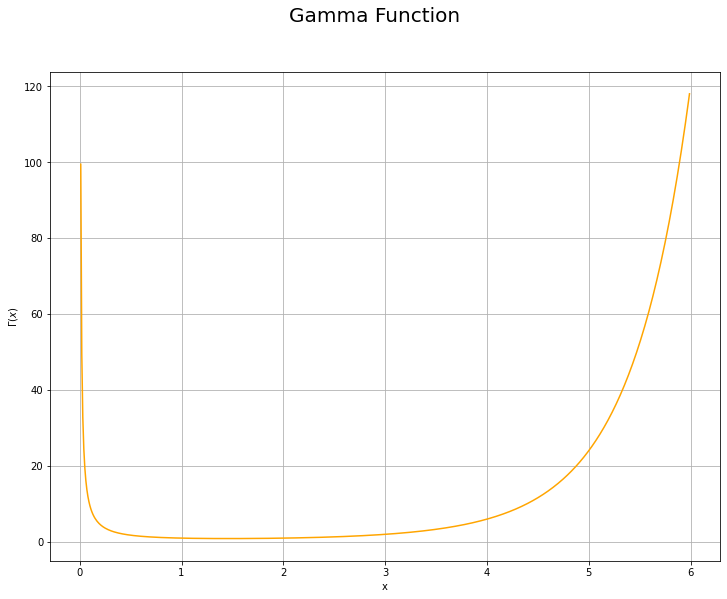

In [9]:
# ガンマ関数を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, y_vals, color='orange') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('$\Gamma(x)$') # y軸ラベル
plt.suptitle('Gamma Function', fontsize=20) # 全体のタイトル
plt.grid() # グリッド線
plt.show() # 描画

　$x = 0$の垂線に漸近しているのが分かります。  
<br>

### 負の値を含む場合

　続いて、負の実数も含めて、ガンマ関数を計算します。

In [10]:
# xの値を指定:(0と負の整数は計算できない)
x_vals = np.arange(start=-5.0, stop=5.0, step=0.0005)
print(x_vals[:5])

# ガンマ関数の計算
y_vals = gamma(x_vals)
print(y_vals[:5])

[-5.     -4.9995 -4.999  -4.9985 -4.998 ]
[         inf -16.68089686  -8.34757609  -5.56981089  -4.18093459]


　0と負の整数のとき、計算結果が`inf`になります。  

　グラフに表示しない値をマスクします。(マスクしておかないと不連続な点を繋いだグラフになります。)

In [11]:
# 閾値を指定
threshold = 10.0

# 閾値外の値をマスク
y_mask_vals = np.ma.masked_where((y_vals < -threshold) | (y_vals > threshold), y_vals)
print(y_mask_vals[:5])

[-- -- -8.347576090322463 -5.569810889197673 -4.180934591519495]


　閾値`threshold`を指定して、その範囲外の値の要素を`np.ma.masked_where()`でマスクします。第1引数にマスクする条件、第2引数にマスクしない場合に返す値を指定します。この例では、$y < - \mathrm{threshold}$、$\mathrm{threshold} < y$の値をマスクします。複数の条件`A, B`の一方でも該当する要素をマスクする場合は、`(A) | (B)`と書きます。  

　ガンマ関数のグラフを作成します。

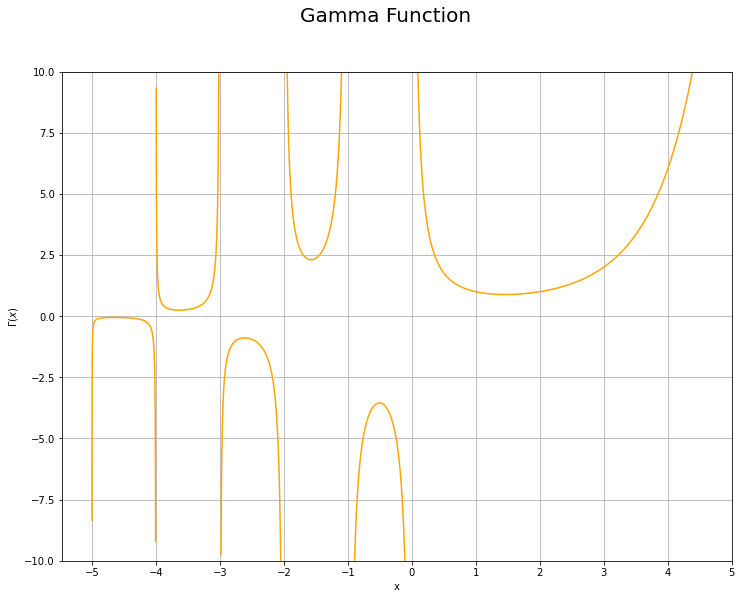

In [12]:
# ガンマ関数を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, y_mask_vals, color='orange') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('$\Gamma(x)$') # y軸ラベル
plt.suptitle('Gamma Function', fontsize=20) # 全体のタイトル
plt.xticks(ticks=np.arange(start=np.floor(x_vals.min()), stop=np.ceil(x_vals.max())+1.0)) # x軸目盛
plt.ylim(ymin=-threshold, ymax=threshold) # y軸の表示範囲
plt.grid() # グリッド線
plt.show() # 描画

　x軸の値が負の整数と0の点において、不連続なグラフになっているのが分かります。(マスクせずに線が繋がらないようにする引数の設定とかないですか？)  
<br>

# Pythonでディガンマ関数の作図

　ディガンマ関数(Digamma Function)の計算を確認して、グラフを作成します。  
<br>

　利用するライブラリを読み込みます。

In [13]:
# 利用するライブラリ
import numpy as np
from scipy.special import digamma # ディガンマ関数
import matplotlib.pyplot as plt

<br>

## 定義式の確認

　まずは、ディガンマ関数の定義式を確認します。  
<br>

　ディガンマ関数は、次の式で定義されます。

$$
\psi(x)
    = \frac{d}{d x} \log \Gamma(x)
    = \frac{1}{\Gamma(x)}
      \frac{d \Gamma(x)}{d x}
$$

　ここで、$\Gamma(x)$はガンマ関数です。対数関数の微分は$\frac{d \log x}{d x} = \frac{1}{x}$です。ガンマ関数については「ガンマ関数の性質」を参照してください。  
<br>

## ガンマ関数の計算

　続いて、ディガンマ関数の計算方法を確認します。  
<br>

　`SciPy`ライブラリの`special`モジュールのディガンマ関数`digamma()`を使って計算します。

In [14]:
# 変数の値を指定
x = 4.0

# ディガンマ関数の計算
y = digamma(x)
print(y)

1.2561176684318003


<br>

　$x$が0または負の整数の場合は計算できません。

In [15]:
# ディガンマ関数を計算:(計算できない)
print(digamma(0.0))
print(digamma(-3.0))

-inf
nan


<br>

　ディガンマ関数の計算を確認できました。次は、ディガンマ関数を可視化します。  
<br>

## グラフの作成

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用して、ディガンマ関数のグラフを作成します。  
<br>

### 非負の値の場合

　まずは、0より大きい実数$x$を範囲として、ディガンマ関数を計算します。

In [16]:
# x軸の値を指定:(x > 0)
x_vals = np.arange(start=0.01, stop = 5.0, step=0.01)
print(x_vals[:5])

# ディガンマ関数の計算
y_vals = digamma(x_vals)
print(y_vals[:5])

[0.01 0.02 0.03 0.04 0.05]
[-100.56088546  -50.54478931  -33.86225442  -25.51327488  -20.49784499]


　x軸の値を作成して`x_vals`とします。  
　作成した`x_vals`を用いて、`digamma()`でディガンマ関数の計算をします。  

　ディガンマ関数のグラフを作成します。

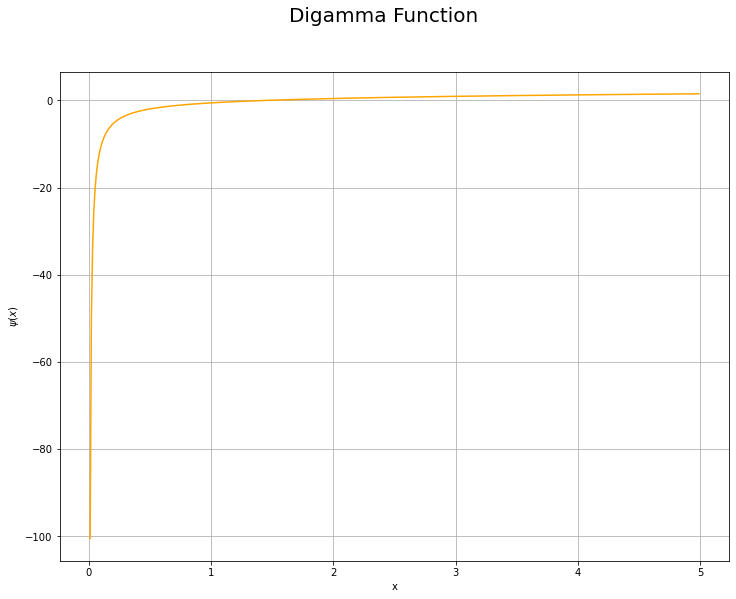

In [17]:
# ディガンマ関数を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, y_vals, color='orange') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('$\psi(x)$') # y軸ラベル
plt.suptitle('Digamma Function', fontsize=20) # 全体のタイトル
plt.grid() # グリッド線
plt.show() # 描画

　$x = 0$の垂線に漸近しているのが分かります。  
<br>

### 負の値を含む場合

　続いて、負の実数も含めて、ディガンマ関数を計算します。

In [18]:
# x軸の値を指定:(0と負の整数は計算できない)
x_vals = np.arange(start=-5.0, stop=5.0, step=0.002)
print(x_vals[:5])

# ディガンマ関数の計算
y_vals = digamma(x_vals)
print(y_vals[:5])

[-5.    -4.998 -4.996 -4.994 -4.992]
[          nan -498.28766529 -248.28144827 -164.94189785 -123.26901391]


　0のとき計算結果が`-inf`、負の整数のとき`NaN`になります。

　グラフに表示しない値をマスクします。(マスクしておかないと不連続な点を繋いだグラフになります。)

In [19]:
# 閾値を指定
threshold = 10.0

# 閾値外の値をマスク
y_mask_vals = np.ma.masked_where((y_vals < -threshold) | (y_vals > threshold), y_vals)
print(y_mask_vals[:5])

[nan -- -- -- --]


　閾値`threshold`を指定して、その範囲外の値の要素を`np.ma.masked_where()`でマスクします。第1引数にマスクする条件、第2引数にマスクしない場合に返す値を指定します。この例では、$y < - \mathrm{threshold}$、$\mathrm{threshold} < y$の値をマスクします。複数の条件`A, B`の一方でも該当する要素をマスクする場合は、`(A) | (B)`と書きます。  

　ディガンマ関数のグラフを作成します。

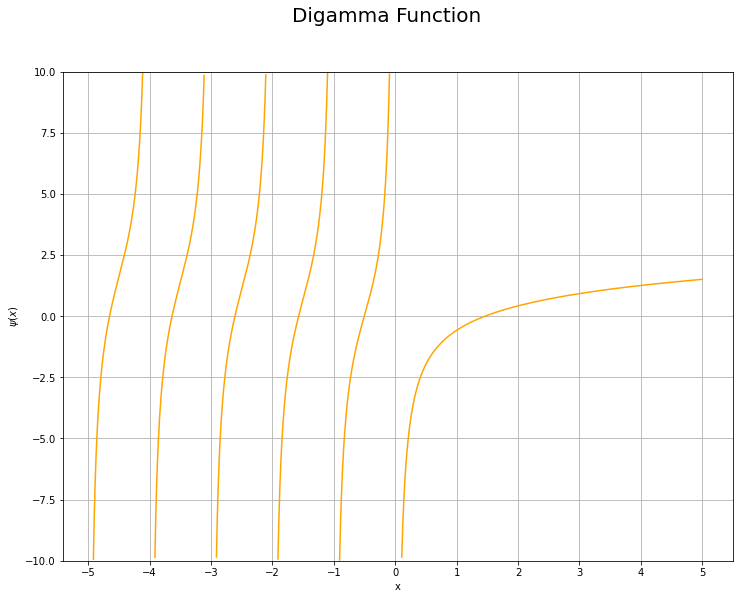

In [20]:
# ディガンマ関数を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, y_mask_vals, color='orange') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('$\psi(x)$') # y軸ラベル
plt.suptitle('Digamma Function', fontsize=20) # 全体のタイトル
plt.xticks(ticks=np.arange(start=np.floor(x_vals.min()), stop=np.ceil(x_vals.max())+1.0)) # x軸目盛
plt.ylim(ymin=-threshold, ymax=threshold) # y軸の表示範囲
plt.grid() # グリッド線
plt.show() # 描画

　x軸の値が負の整数と0の点において、不連続なグラフになっているのが分かります。(マスクせずに線が繋がらないようにする引数の設定とかないですか？)  
<br>

# Pythonでベータ関数の作図

　ベータ関数(Beta Function)の計算を確認して、グラフを作成します。  
<br>

　利用するライブラリを読み込みます。

In [21]:
# 利用するライブラリ
import numpy as np
from scipy.special import gamma, gammaln, beta # ガンマ関数, 対数ガンマ関数, ベータ関数
import matplotlib.pyplot as plt

<br>

## 定義式の確認

　まずは、ベータ関数の定義式を確認します。  
<br>

　ベータ関数は、次の式で定義されます。

$$
B(\alpha,\beta)
    = \int_0^1
          x^{\alpha-1}
          (1 - x)^{\beta-1}
      dx
    = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

　ここで、$\Gamma(x)$はガンマ関数です。ガンマ関数については「ガンマ関数の性質」を参照してください。  
<br>

## ベータ関数の計算

　続いて、ベータ関数の計算方法を確認します。  
<br>

　`SciPy`ライブラリの`special`モジュールのガンマ関数`gamma()`を使って計算します。

In [22]:
# 変数の値を指定
a = 2.1
b = 3.2

# ガンマ関数によりベータ関数の計算
z = gamma(a) * gamma(b) / gamma(a + b)
print(z)

0.06661713159437423


　ガンマ関数の定義式

$$
B(\alpha,\beta)
    = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

を計算します。

　対数ガンマ関数`gammaln()`を使って計算します。

In [23]:
# 対数ガンマ関数によりベータ関数の計算
log_z = gammaln(a) + gammaln(b) - gammaln(a + b)
z = np.exp(log_z)
print(z)

0.06661713159437421


　対数をとった定義式

$$
\log B(\alpha,\beta)
    = \log \Gamma(\alpha) + \log \Gamma(\beta)
      - \log \Gamma(\alpha + \beta)
$$

を計算します。  
　計算結果の指数をとります。

$$
B(\alpha,\beta)
    = \exp \Bigr(
          \log B(\alpha,\beta)
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　ベータ関数`beta()`を使って計算します。

In [24]:
# ベータ関数の計算
z = beta(a, b)
print(z)

0.06661713159437423


<br>

　$x$が0または負の整数の場合は計算できません。

In [25]:
# ベータ関数を計算:(計算できない)
print(beta(2.5, 0.0))
print(beta(-2.0, 2.5))

inf
inf


<br>

　ベータ関数の計算を確認できました。次は、ベータ関数を可視化します。  
<br>

## グラフの作成

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用して、ベータ関数のグラフを作成します。  
<br>

### 非負の値の場合

　まずは、0より大きい実数$\alpha, \beta$を範囲として、ベータ関数を計算します。

In [26]:
# x軸とy軸の値を指定:(a > 0, b > 0)
a_vals = np.arange(start=0.01, stop = 3.0, step=0.01)
b_vals = np.arange(start=0.01, stop = 3.0, step=0.01)
print(a_vals[:5])
print(b_vals[:5])

[0.01 0.02 0.03 0.04 0.05]
[0.01 0.02 0.03 0.04 0.05]


　x軸($\alpha$)の値を作成して`a_vals`、y軸($\beta$)の値を作成して`b_vals`とします。  

　格子点に変換します。

In [27]:
# 格子状の点を作成
a_grid, b_grid = np.meshgrid(a_vals, b_vals)
print(a_grid[:5, :5])
print(b_grid[:5, :5])
print(a_grid.shape)

[[0.01 0.02 0.03 0.04 0.05]
 [0.01 0.02 0.03 0.04 0.05]
 [0.01 0.02 0.03 0.04 0.05]
 [0.01 0.02 0.03 0.04 0.05]
 [0.01 0.02 0.03 0.04 0.05]]
[[0.01 0.01 0.01 0.01 0.01]
 [0.02 0.02 0.02 0.02 0.02]
 [0.03 0.03 0.03 0.03 0.03]
 [0.04 0.04 0.04 0.04 0.04]
 [0.05 0.05 0.05 0.05 0.05]]
(299, 299)


　`np.meshgrid()`で`a_vals, b_vals`の全ての組み合わせを持つ配列を作成して`a_grid, b_grid`とします。  

　ベータ関数を計算します。

In [28]:
# ベータ関数の計算
z_grid = beta(a_grid, b_grid)
print(z_grid[:5, :5])

[[199.96757732 149.95171626 133.2694139  124.92066437 119.90546205]
 [149.95171626  99.93608768  83.25401521  74.90549309  69.89051572]
 [133.2694139   83.25401521  66.5721701   58.22387282  53.20911788]
 [124.92066437  74.90549309  58.22387282  49.87579792  44.86126291]
 [119.90546205  69.89051572  53.20911788  44.86126291  39.84694542]]


　作成した`a_grid, b_grid`を用いて、`beta()`でベータ関数の計算をします。  

　ベータ関数のグラフを作成します。

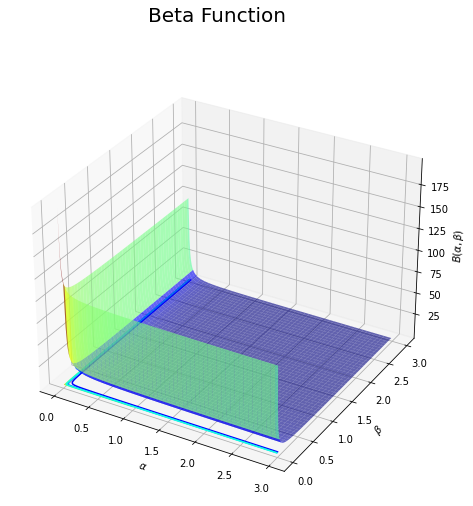

In [29]:
# ベータ関数を作図
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(a_grid, b_grid, z_grid, cmap='jet', alpha=0.6) # 曲面図
ax.contour(a_grid, b_grid, z_grid, cmap='jet', offset=z_grid.min()) # 等高線図
ax.set_xlabel('$\\alpha$') # x軸ラベル
ax.set_ylabel('$\\beta$') # y軸ラベル
ax.set_zlabel('$B(\\alpha, \\beta)$') # z軸ラベル
fig.suptitle('Beta Function', fontsize=20) # 全体のタイトル
plt.show() # 描画

　$\alpha = 0$と$\beta = 0$の垂線に漸近しているのが分かります。  
<br>

### 負の値を含む場合

　続いて、負の実数も含めて、ベータ関数を計算します。

In [30]:
# x軸とy軸の値を指定:(0と負の整数は計算できない)
a_vals = np.arange(start=-2.0, stop=2.0, step=0.001)
b_vals = np.arange(start=-2.0, stop=2.0, step=0.001)

# 格子状の点を作成
a_grid, b_grid = np.meshgrid(a_vals, b_vals)
print(a_grid.shape)

# ベータ関数の計算
z_grid = beta(a_grid, b_grid)
print(np.round(z_grid[:5, :5], 2))

(4000, 4000)
[[     inf      inf      inf      inf      inf]
 [     inf 11985.97  8984.2   7981.27  7478.05]
 [     inf  8984.2   5985.94  4985.34  4484.16]
 [     inf  7981.27  4985.34  3985.91  3485.6 ]
 [     inf  7478.05  4484.16  3485.6   2985.88]]


　0と負の整数のとき、計算結果が`inf`になります。  

　グラフに表示しない値をマスクします。

In [31]:
# 閾値を指定
threshold = 10.0

# 閾値外の値をマスク
z_mask_grid = np.ma.masked_where((z_grid < -threshold) | (z_grid > threshold), z_grid)
print(z_mask_grid[:5, :5])

[[-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]]


　閾値`threshold`を指定して、その範囲外の値の要素を`np.ma.masked_where()`でマスクします。第1引数にマスクする条件、第2引数にマスクしない場合に返す値を指定します。この例では、$y < - \mathrm{threshold}$、$\mathrm{threshold} < y$の値をマスクします。複数の条件`A, B`の一方でも該当する要素をマスクする場合は、`(A) | (B)`と書きます。  

　ベータ関数のグラフを作成します。

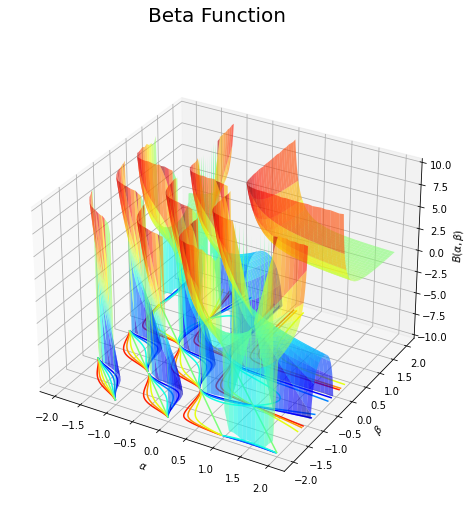

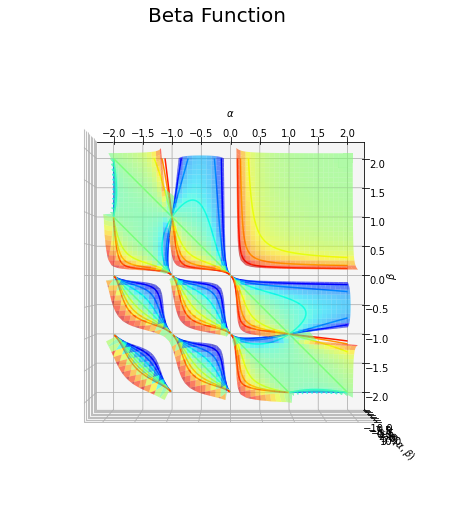

In [32]:
# ベータ関数を作図
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(a_grid, b_grid, z_mask_grid, cmap='jet', alpha=0.6) # 曲面図
ax.contour(a_grid, b_grid, z_mask_grid, cmap='jet', offset=z_mask_grid.min()) # 等高線図
ax.set_xlabel('$\\alpha$') # x軸ラベル
ax.set_ylabel('$\\beta$') # y軸ラベル
ax.set_zlabel('$B(\\alpha, \\beta)$') # z軸ラベル
fig.suptitle('Beta Function', fontsize=20) # 全体のタイトル
ax.set_zlim(zmin=z_mask_grid.min(), zmax=threshold) # z軸の表示範囲
#ax.view_init(elev=90, azim=270) # 表示アングル
plt.show() # 描画

### 資料作成用:(再掲)

# ベータ関数を作図
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(a_grid, b_grid, z_mask_grid, cmap='jet', alpha=0.6) # 曲面図
ax.contour(a_grid, b_grid, z_mask_grid, cmap='jet', offset=z_mask_grid.min()) # 等高線図
ax.set_xlabel('$\\alpha$') # x軸ラベル
ax.set_ylabel('$\\beta$') # y軸ラベル
ax.set_zlabel('$B(\\alpha, \\beta)$') # z軸ラベル
fig.suptitle('Beta Function', fontsize=20) # 全体のタイトル
ax.set_zlim(zmin=z_mask_grid.min(), zmax=threshold) # z軸の表示範囲
ax.view_init(elev=90, azim=270) # 表示アングル
plt.show() # 描画

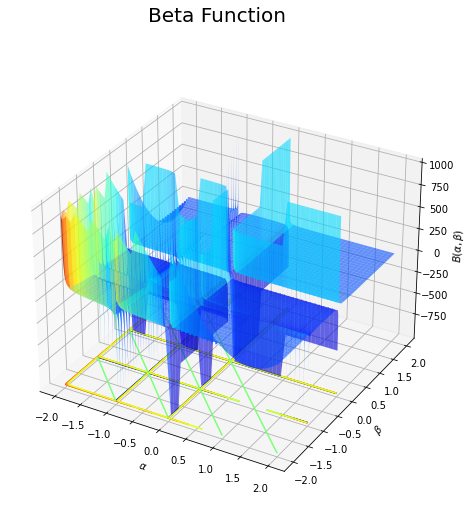

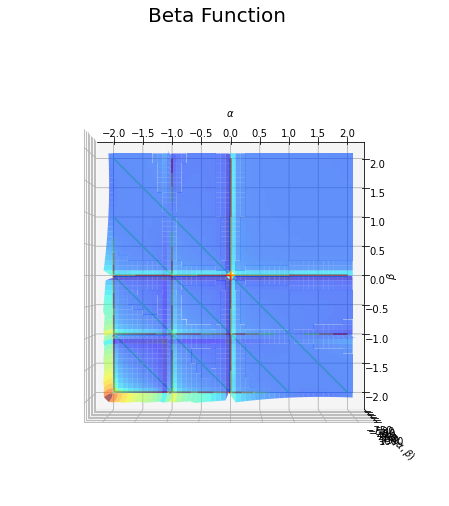

In [33]:
### 資料作成用:(再掲)

# 閾値を指定
threshold = 1000.0

# 閾値外の値をマスク
z_mask_grid = np.ma.masked_where((z_grid < -threshold) | (z_grid > threshold), z_grid)

# ベータ関数を作図
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(a_grid, b_grid, z_mask_grid, cmap='jet', alpha=0.6) # 曲面図
ax.contour(a_grid, b_grid, z_mask_grid, cmap='jet', offset=z_mask_grid.min()) # 等高線図
ax.set_xlabel('$\\alpha$') # x軸ラベル
ax.set_ylabel('$\\beta$') # y軸ラベル
ax.set_zlabel('$B(\\alpha, \\beta)$') # z軸ラベル
fig.suptitle('Beta Function', fontsize=20) # 全体のタイトル
ax.set_zlim(zmin=z_mask_grid.min(), zmax=threshold) # z軸の表示範囲
#ax.view_init(elev=90, azim=270) # 表示アングル
plt.show() # 描画

# ベータ関数を作図
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(a_grid, b_grid, z_mask_grid, cmap='jet', alpha=0.6) # 曲面図
ax.contour(a_grid, b_grid, z_mask_grid, cmap='jet', offset=z_mask_grid.min()) # 等高線図
ax.set_xlabel('$\\alpha$') # x軸ラベル
ax.set_ylabel('$\\beta$') # y軸ラベル
ax.set_zlabel('$B(\\alpha, \\beta)$') # z軸ラベル
fig.suptitle('Beta Function', fontsize=20) # 全体のタイトル
ax.set_zlim(zmin=z_mask_grid.min(), zmax=threshold) # z軸の表示範囲
ax.view_init(elev=90, azim=270) # 表示アングル
plt.show() # 描画

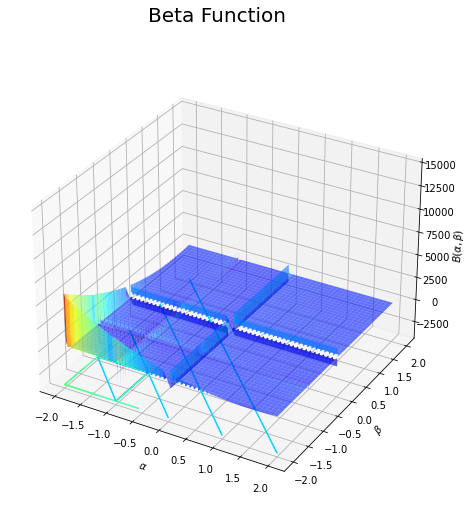

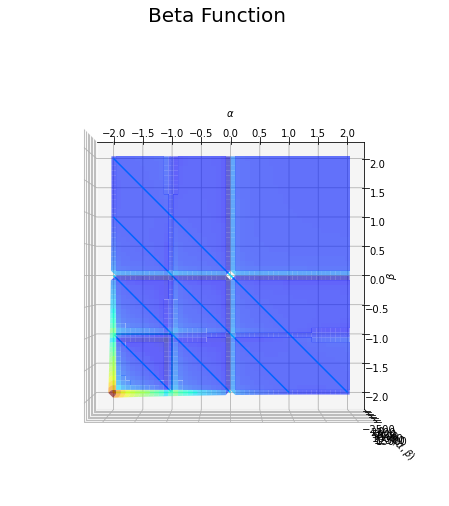

In [34]:
### 資料作成用:(再掲)

# 閾値を指定
threshold = 15000.0

# 閾値外の値をマスク
z_mask_grid = np.ma.masked_where((z_grid < -threshold) | (z_grid > threshold), z_grid)

# ベータ関数を作図
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(a_grid, b_grid, z_mask_grid, cmap='jet', alpha=0.6) # 曲面図
ax.contour(a_grid, b_grid, z_mask_grid, cmap='jet', offset=z_mask_grid.min()) # 等高線図
ax.set_xlabel('$\\alpha$') # x軸ラベル
ax.set_ylabel('$\\beta$') # y軸ラベル
ax.set_zlabel('$B(\\alpha, \\beta)$') # z軸ラベル
fig.suptitle('Beta Function', fontsize=20) # 全体のタイトル
ax.set_zlim(zmin=z_mask_grid.min(), zmax=threshold) # z軸の表示範囲
#ax.view_init(elev=90, azim=270) # 表示アングル
plt.show() # 描画

# ベータ関数を作図
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(a_grid, b_grid, z_mask_grid, cmap='jet', alpha=0.6) # 曲面図
ax.contour(a_grid, b_grid, z_mask_grid, cmap='jet', offset=z_mask_grid.min()) # 等高線図
ax.set_xlabel('$\\alpha$') # x軸ラベル
ax.set_ylabel('$\\beta$') # y軸ラベル
ax.set_zlabel('$B(\\alpha, \\beta)$') # z軸ラベル
fig.suptitle('Beta Function', fontsize=20) # 全体のタイトル
ax.set_zlim(zmin=z_mask_grid.min(), zmax=threshold) # z軸の表示範囲
ax.view_init(elev=90, azim=270) # 表示アングル
plt.show() # 描画

　各軸の値が負の整数と0の点において、不連続なグラフになっているのが分かります。  
<br>

# 参考文献

- 岩田具治『トピックモデル』(機械学習プロフェッショナルシリーズ)講談社,2015年.

<br>